In [8]:
DATA_DIR = "data"

In [9]:
from glob import glob

account_dirs = glob(DATA_DIR + "/*/")

In [257]:
import matplotlib.pyplot as plt

class AccountData:
    def __init__(self, date, delta):
        self.date = date
        self.delta = delta
        self.init_value()
        
    def init_value(self):
        self.value = self.delta.copy()
        for i in range(1, len(self.value)):
            self.value[i] = self.value[i - 1] + self.value[i]
    
    def merge(self, other):
        newx = []
        newy = []
        idx = 0
        other_idx = 0
        
        while idx != len(self.date) and other_idx != len(other.date):
            if self.date[idx] <= other.date[other_idx]:
                newx.append(self.date[idx])
                newy.append(self.delta[idx])
                idx += 1
            else:
                newx.append(other.date[other_idx])
                newy.append(other.delta[other_idx])
                other_idx += 1 
                
        while idx != len(self.date):
            newx.append(self.date[idx])
            newy.append(self.delta[idx])
            idx += 1
            
        while other_idx != len(other.date):
            newx.append(other.date[other_idx])
            newy.append(other.delta[other_idx])
            other_idx += 1   
            
        return AccountData(newx, newy)
    
    def plot(self):
        plt.figure(figsize=(20, 20))
        plt.plot(self.date, self.value)
        plt.show()        

In [242]:
from os import walk
import pandas as pd
from datetime import datetime

def build_account_data(account_dir):
    filenames = next(walk(account_dir), (None, None, []))[2]
    assert(len(filenames) == 1)
    filename = filenames[0]
    
    df = pd.read_csv(account_dir + "/" + filename, sep=";")
    df.fillna(method='ffill', inplace=True)
    
    indices = {"date" : 0, "status" : 3, "value" : 6, "bonus" : 12}
    
    filtered = [df.iloc[i] for i in range(len(df)) if df.iloc[i][indices["status"]] == "OK"]
    x = [item[indices["date"]].split()[0] for item in filtered]
    y = [float(item[indices["value"]].replace(",", ".")) for item in filtered]
    assert(len(x) == len(y))
    
    x = x[::-1]
    y = y[::-1]
    
    x = [datetime.strptime(date, '%d.%m.%Y').date() for date in x]
        
    return AccountData(x, y)

def plot_account(account_dir):
    print(account_dir)
    data = build_account_data(account_dir)
    data.plot()

In [243]:
account_dirs[2]

'data/debet/'

data/debet/


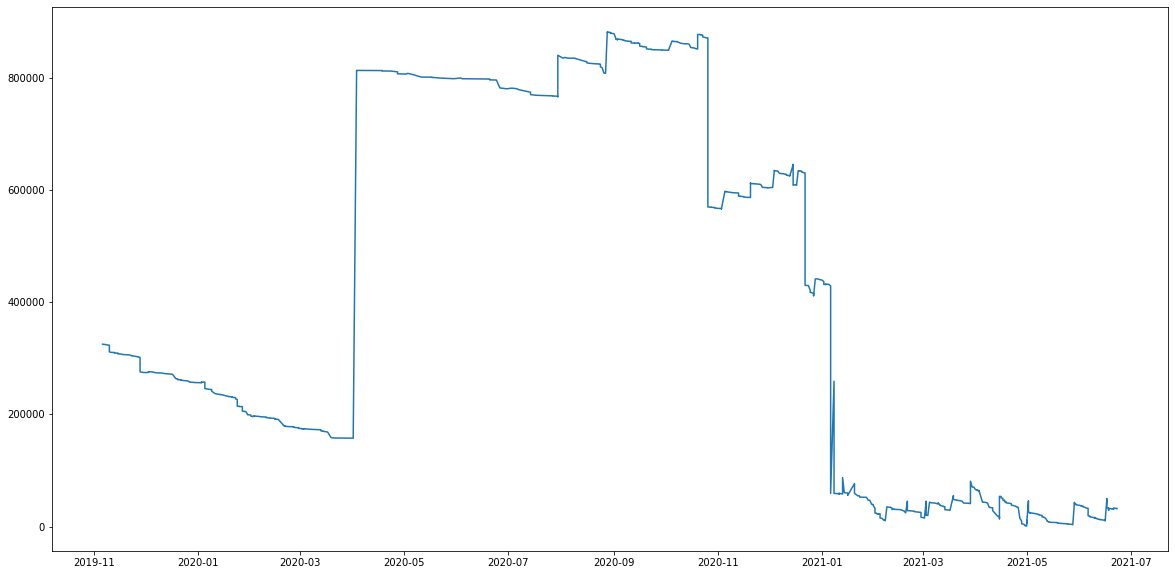

In [244]:
plot_account(account_dirs[2])

data/savings/


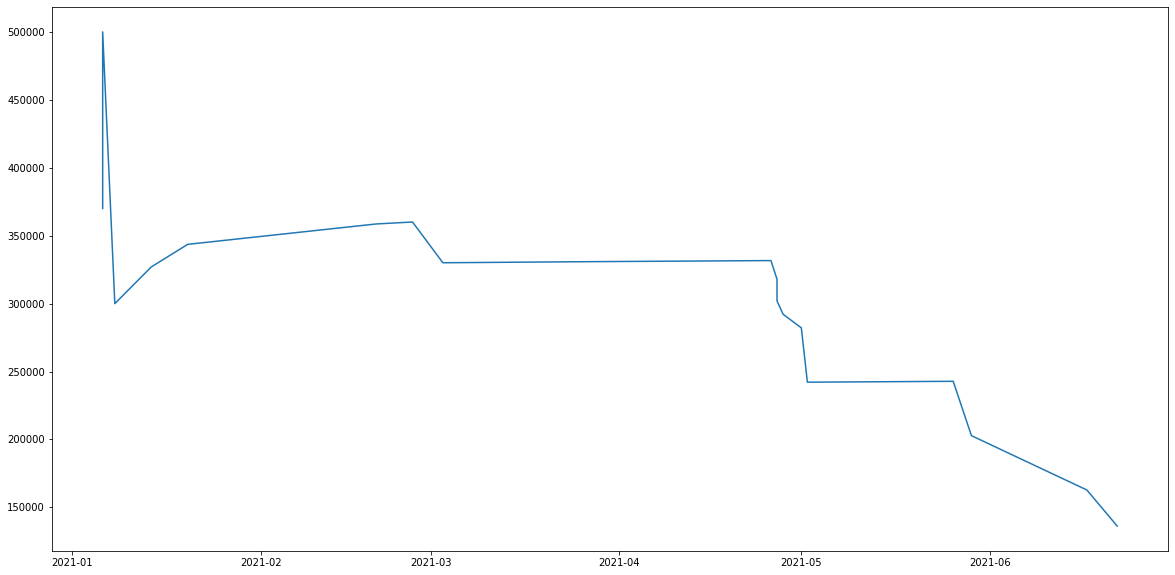

In [245]:
plot_account(account_dirs[1])

data/deposit/


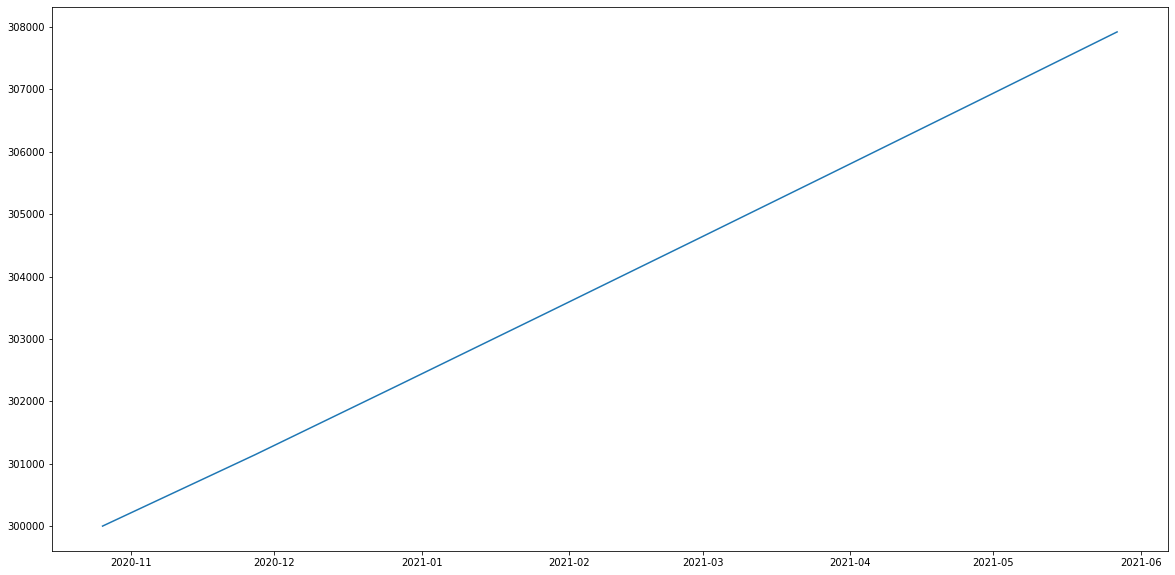

In [246]:
plot_account(account_dirs[0])

In [255]:
deposit = build_account_data(account_dirs[0])
savings = build_account_data(account_dirs[1])
debet = build_account_data(account_dirs[2])

total = debet.merge(deposit).merge(savings)

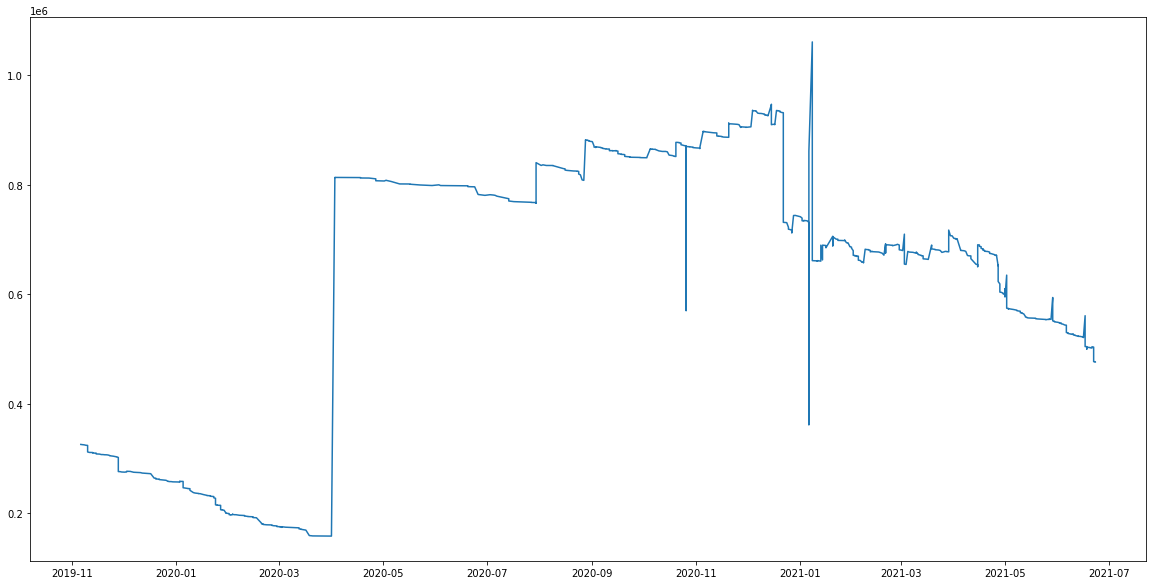

In [258]:
total.plot()